<a href="https://colab.research.google.com/github/jefersonfreittas1/Python-Tutorial/blob/main/erros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UFSM00171 - Métodos Numéricos para Engenharia Química

## Aula 05: Análise de erros em Métodos Numéricos

Nesta aula iremos abordar análise de erros em métodos numéricos, fundamental para o entendimento das limitações e da precisão dos métodos numéricos empregados. Iniciaremos com fundamentos sobre erros absolutos e erros relativos e vamos explorar como erros podem se propagar através dos cálculos.



## Erro Absoluto e Erro Relativo

Erros em métodos numéricos podem, geralmente, ser categorizados em dois tipos: **erro absoluto** and **erro relativo**.

### Erro Absoluto

Erro Absoluto é a diferença entre o valor verdadeiro e o valor aproximado:

$$
\text{Erro Absoluto} = | \text{Valor Verdadeiro} - \text{Valor Aproximado} |
$$

### Erro Relativo

Erro Relativo é o erro absoluto normalizado pelo valor verdadeiro, dando um senso da magnitude do erro em relação ao valor verdadeiro:

$$
\text{Erro Relativo} = \frac{| \text{Valor Verdadeiro} - \text{Valor Aproximado} |}{| \text{Valor Verdadeiro} |}
$$

Vamos explorar estes conceitos com um exemplo:


In [1]:

# Exemplo de cálculo de Erro Absoluto e Erro Relativo

valor_verdadeiro = 2.0
valor_aproximado = 1.9

# Calcule o Erro Absoluto
erro_abs = (valor_verdadeiro - valor_aproximado)
print(f"Erro Absoluto: {erro_abs:.4f}")

# Calcule o Erro Relativo
erro_rel = erro_abs / (valor_verdadeiro)
print(f"Erro Relativo: {erro_rel:.4f}")

Erro Absoluto: 0.1000
Erro Relativo: 0.0500



## Propagação de Erros

Quando múltiplas operações são executadas dentro de métodos numéricos, erros podem se propagar e se acumular, levando a potenciais desvios significativos do valor real.

### Exemplo de Propagação de Erro

Vejamos como erros podem se acumular em uma sequência de operações:


In [ ]:
# Exemplo de propagação de erros

import numpy as np

# Valores reais e valores aproximados
val_real = np.array([1.0, 2.0, 3.0])
val_aprox = np.array([1.1, 1.9, 3.1])

# Calcula os erros absolutos e relativos
erro_abs = np.abs(val_real - val_aprox)
erro_rel = np.abs(val_real - val_aprox)/np.abs(val_real)
print(f"Erros absolutos: {erro_abs}")
print(f"Erros relativos: {erro_rel}")

# Calcula a soma dos erros absoluto e relativo
soma_erro_abs = np.sum(erro_abs)
soma_erro_rel = np.sum(erro_rel)

print(f"Soma dos erros absolutos: {soma_erro_abs:.4f}")
print(f"Soma dos erros relativos: {soma_erro_rel:.4f}")


Erros absolutos: [0.1 0.1 0.1]
Erros relativos: [0.1        0.05       0.03333333]
Soma dos erros absolutos: 0.3000
Soma dos erros relativos: 0.1833



## Problema aplicado
Na matemática, funções podem ser representadas por séries infinitas. Por exemplo, a função exponencial pode ser computada aproximadamente utilizando: <br>
$e^x ≃ 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!}+...+\frac{x^n}{n!}$ <br>
Assim, quanto mais termos são adicionados à série, mais a aproximação se torna melhor como estimativa do valor verdadeiro de $e^x$. <br>
<br>
Iniciando por $e^x ≃ 1$, adicione termos um a um para estimar o valor de $e^{0.5}$. A cada novo termo adicionado, calcule os erros absoluto e relativo.


In [ ]:
import math
math.factorial(3)

6

In [ ]:
import numpy as np

x = 0.5
termos = 6

soma = 0
for i in range(termos):
    j = 1
    fact = 1
    for j in range(1,i+1):
        fact *= j
    soma += x**i/fact

print('Solução real:',np.exp(x))
print('Aproximação:',soma)
print('Erro absoluto:',abs(np.exp(x)-soma))
print('Erro relativo:',abs(np.exp(x)-soma)/np.exp(x))

Solução real: 1.6487212707001282
Aproximação: 1.6486979166666667
Erro absoluto: 2.33540334615423e-05
Erro relativo: 1.4164937322380167e-05


In [ ]:
import numpy as np
import math

# Input values
x = 0.5
tol = 1e-6
termos = 10  # Maximum number of terms to try (user-defined)

# Pre-allocate arrays for storing errors
erro_abs = np.ones(termos)
erro_rel = np.ones(termos)

soma = 0  # Initialize the summation for the series approximation

# Loop over the number of terms, starting from 1 up to 'termos'
for k in range(termos):
    # Calculate the k-th term in the series expansion for exp(x)
    termo = x**k / math.factorial(k)

    # Add the current term to the summation
    soma += termo

    # Calculate absolute and relative errors
    erro_abs[k] = abs(np.exp(x) - soma)
    erro_rel[k] = erro_abs[k] / np.exp(x)

    # Display the current step and errors
    print(f'Número de termos = {k+1}')
    print('Erro absoluto:', erro_abs[k])
    print('Erro relativo:', erro_rel[k])

    # Check if the relative error is smaller than the tolerance
    if erro_rel[k] < tol:
        print('Converged within tolerance.')
        break

# Final output after the loop
print('\nSolução real:', np.exp(x))
print('Aproximação:', soma)
print('Número de termos usados:', k + 1)
print('Erro absoluto final:', erro_abs[k])
print('Erro relativo final:', erro_rel[k])


Número de termos = 1
Erro absoluto: 0.6487212707001282
Erro relativo: 0.3934693402873666
Número de termos = 2
Erro absoluto: 0.1487212707001282
Erro relativo: 0.09020401043104989
Número de termos = 3
Erro absoluto: 0.023721270700128194
Erro relativo: 0.014387677966970715
Número de termos = 4
Erro absoluto: 0.002887937366794935
Erro relativo: 0.0017516225562908972
Número de termos = 5
Erro absoluto: 0.00028377070012819416
Erro relativo: 0.00017211562995586948
Número de termos = 6
Erro absoluto: 2.33540334615423e-05
Erro relativo: 1.4164937322380167e-05
Número de termos = 7
Erro absoluto: 1.652644572747164e-06
Erro relativo: 1.0023796029788404e-06
Número de termos = 8
Erro absoluto: 1.0254536642051448e-07
Erro relativo: 6.219690874550838e-08
Converged within tolerance.

Solução real: 1.6487212707001282
Aproximação: 1.6487211681547618
Número de termos usados: 8
Erro absoluto final: 1.0254536642051448e-07
Erro relativo final: 6.219690874550838e-08


# Erros de Truncamento

## Exemplo - Série de Taylor

O teorema de Taylor diz que se uma função e suas $n+1$ derivadas forem contínuas no intervalo contendo $x_i$ e $x_{i+1}=x_i + h$, então o valor da função em $x_{i+1}$ é dado por: <br> <br>
$$f(x_{i+1}) = f(x_i) + f'(x_i)h+\frac{f''(x_i)}{2}h^2+\frac{f^{(3)}(x_i)}{3!}h^3+...+\frac{f^{(n)}(x_i)}{n!}h^n+R_n$$ <br>
Sendo $R_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}h^{n+1}$

Use a expansão de série de Taylor para aproximar $f(x)=cos(x)$ em $x_{i+1}=π/3$
 baseado no valor de $f(x)$ e suas derivadas em $x_{i+1}=π/4$. <br>
Obtenha o valor aproximado usando $n$ indo de 0 a 6.

Sendo $f(x) = cos(x)$, temos que:
- $f'(x) = -sen(x)$
- $f''(x) = -cos(x)$
- $f^{(3)}(x) = sen(x)$

In [ ]:
import numpy as np

def taylor_cos(x, x0, h, n):
    soma = 0        # Inicializa o somatório
    fatorial = 1    # Inicializa o fatorial
    for i in range(n+1):
        # Determina qual função usar: cosseno ou seno
        if i % 4 == 0:
            f = np.cos(x0)
        elif i % 4 == 1:
            f = -np.sin(x0)
        elif i % 4 == 2:
            f = -np.cos(x0)
        else:
            f = np.sin(x0)

        # Soma o termo ao resultado:
        soma += f*h**i/fatorial
        fatorial *= (i+1)
    return soma

# Exemplo de uso:
x = np.pi / 3   # Ponto para aproximar f=cos(x)
x0 = np.pi / 4  # Ponto de expansão
h = x - x0      # Tamanho do passo
n = int(input("Insira o número de termos para a série de Taylor: "))  # Número de termos

aprox = taylor_cos(x, x0, h, n)
print(f"Aproximação por Série de Taylor de cos(pi/3) with {n} terms: {aprox}")
print(f"Valor real de cos(pi/3): {np.cos(x)}")
print(f"Erro absoluto: {abs(np.cos(x)-aprox)}")
print(f"Erro relativo percentual: {100*abs(np.cos(x)-aprox)/np.cos(x)}")

Insira o número de termos para a série de Taylor: 4
Aproximação por Série de Taylor de cos(pi/3) with 4 terms: 0.500007550810613
Valor real de cos(pi/3): 0.5000000000000001
Erro absoluto: 7.550810612877434e-06
Erro relativo percentual: 0.0015101621225754864


## Exemplo 2 - Bungee Jump
Uma pessoa que pesa 68kg salta de um bungee jump.<br>
i. Qual o perfil de velocidade nos primeiros 12s de queda? <br>
ii. Qual a velocidade terminal caso a corda fosse infinitamente longa? <br>
iii. Compare os resultados da solução analítica com a aproximação por Séries de Taylor. <br>
Utilize um coeficiente de arraste de 0,25 kg/m.
<br>
__Solução__: <br>
$\frac{dv}{dt}=\frac{F}{m}$ <br>
Sendo <br>
$F = F_g + F_a$ <br>
$F_g = mg$ <br>
$F_a = -c_a v^2$ <br>
Assim: <br>
$\frac{dv}{dt}=g-\frac{c_a}{m}v^2$ <br>
Para $v=0$ em $t=0$ temos a seguinte solução analítica: <br>
$$v(t) = \sqrt{\frac{gm}{c_d}} tanh \left( \sqrt{\frac{gc_d}{m}} t \right)$$ <br>
<br>
Muitas vezes, no entanto, a solução analítica será de difícil ou impossível obtenção. Para solucionar este problema, pode-se empregar Métodos Numéricos, métodos que permitem que um problema seja resolvido através de uma sequência de operações aritméticas. <br>
No caso do exemplo, o modelo pode ser aproximado por:  <br>
$\frac{dv}{dt} \simeq \frac{\Delta v}{\Delta t} = \frac{v(t_{i+1}) - v(t_i)}{t_{i+1}-t_i}$ <br>
Assim: <br>
$\frac{v(t_{i+1}) - v(t_i)}{t_{i+1}-t_i} = g - \frac{c_d}{m}v^2$ <br>
Rearranjando:
$v(t_{i+1})=v(t_i) + \left[ g - \frac{c_d}{m}v(t_i)^2 \right] (t_{i+1}-t_i)$ <br>
Reescrevendo: <br>
$v_{i+1}=v_i + \frac{dv_i}{dt} \Delta t$ <br>



       Tempo (s)  Solução analítica (m/s)  Solução aproximada (m/s)
0   1.000000e-08             9.800000e-08                  0.000000
1   1.000000e+00             9.683976e+00                  9.800000
2   2.000000e+00             1.870972e+01                 19.246912
3   3.000000e+00             2.658657e+01                 27.684987
4   4.000000e+00             3.307583e+01                 34.667125
5   5.000000e+00             3.817286e+01                 40.048707
6   6.000000e+00             4.202835e+01                 43.952020
7   7.000000e+00             4.486243e+01                 46.649887
8   8.000000e+00             4.690216e+01                 48.449108
9   9.000000e+00             4.834798e+01                 49.619270
10  1.000000e+01             4.936178e+01                 50.367535
11  1.100000e+01             5.006727e+01                 50.840738
12  1.200000e+01             5.055560e+01                 51.137868
13  1.300000e+01             5.089239e+01       

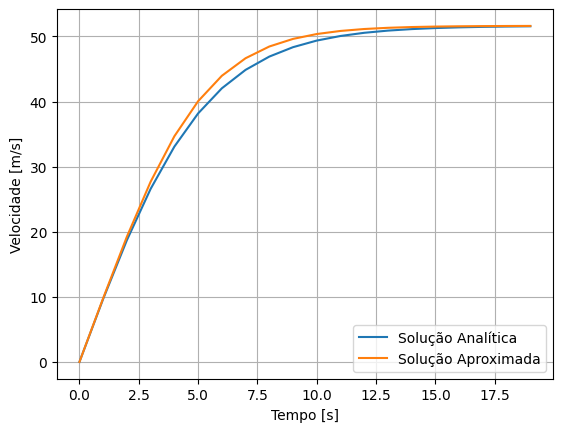

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dt = 1      # Passo (delta t, [s])
tf = 20     # Tempo final
# Dados:
g = 9.8     # Aceleração da gravidade [m/s^2]
cd = 0.25   # Coeficiente de arrasto [kg/m]
m = 68      # Massa [kg]

# Solução analítica
t = np.arange(0.00000001,tf,dt)
v_analitico = np.sqrt(g*m/cd)*np.tanh(np.sqrt(cd*g/m)*t)

# Solução aproximada
NP = np.size(t)         # Número de pontos a serem calculados
v_aprox = np.zeros(NP)  # Pré-alocação do vetor das velocidades
v_aprox[0] = 0          # Condição inicial (t=0, v=0)
for i in range(NP-1):
    dvdt = g - cd/m*v_aprox[i]**2
    v_aprox[i+1] = v_aprox[i] + dvdt*dt

# Plot
plt.plot(t,v_analitico,label='Solução Analítica')
plt.plot(t,v_aprox,label='Solução Aproximada')
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade [m/s]')
plt.legend()
plt.grid(True)

# Cria tabela com os resultados
data = {
    'Tempo (s)': t,
    'Solução analítica (m/s)': v_analitico,
    'Solução aproximada (m/s)': v_aprox,
    # 'Erro absoluto': np.abs(v_analitico - v_aprox),
    # 'Erro relativo': np.abs(v_analitico - v_aprox) / v_analitico
}

df = pd.DataFrame(data)
print(df)

# Erro absoluto total e erro relativo total
erro_abs_total = np.sum(np.abs(v_analitico - v_aprox))
erro_rel_total = np.sum(np.abs(v_analitico - v_aprox) / v_analitico)
print(f'Erro total absoluto: {erro_abs_total:.4f}')
print(f'Erro total relativo: {erro_rel_total:.4f}')

# Erros Totais
A soma dos erros de truncamento com os erros de arredondamento feito pelo computador resulta no erro total.
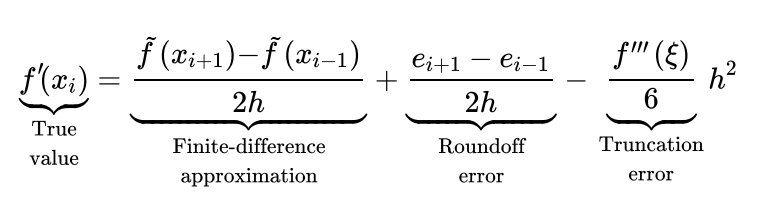 <br>
*(Fonte: Applied Numerical Methods with Python for Engineers and Scientists, CHAPRA 2016)*

Tamanho do passo      Dif. Finita      Erro
  2.0000000000    -2.31250000000000     1.40000000000000
  0.2000000000    -0.92650000000000     0.01400000000000
  0.0200000000    -0.91264000000000     0.00014000000000
  0.0020000000    -0.91250139999999     0.00000139999999
  0.0002000000    -0.91250001399978     0.00000001399978
  0.0000200000    -0.91250000014143     0.00000000014143
  0.0000020000    -0.91250000000542     0.00000000000542
  0.0000002000    -0.91250000000542     0.00000000000542
  0.0000000200    -0.91249999778498     0.00000000221502
  0.0000000020    -0.91250001998944     0.00000001998944


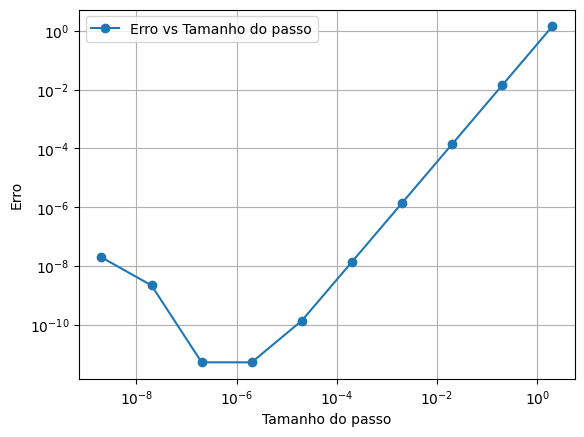

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função que calcula as diferenças finitas e os erros
def derivada(f, df, x, n, h):
    df_real = df(x) # Valor verdadeiro
    # Pré alocação das variáveis
    H = np.zeros(n)     # Vetor dos passos
    diff = np.zeros(n)  # Vetor das diferenças finitas
    erro = np.zeros(n)  # Vetor dos erros

    H[0] = h
    diff[0] = (f(x+h) - f(x-h)) / (2*h)
    erro[0] = np.abs(df_real - diff[0])

    for i in range(1, n):
        h /= 10     # Divide por um fator de 10
        H[i] = h
        diff[i] = (f(x+h) - f(x-h)) / (2*h)
        erro[i] = np.abs(df_real - diff[i])

    return H, diff, erro

# Define a função e sua derivativa
f = lambda x: -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2
df = lambda x: -0.4*x**3 - 0.45*x**2 - x - 0.25

# Parâmetros
x = 0.5     # Valor real de x
n = 10      # Número de vezes para dividir o passo inicial
h = 2.0     # Passo inicial

# Calcula o tamanho do passo, as diferenças finitas e os erros
H, D, E = derivada(f, df, x, n, h)

# Mostra os resultados
print('Tamanho do passo      Dif. Finita      Erro')
for step, diff_value, error in zip(H, D, E):
    print(f'{step:14.10f} {diff_value:20.14f} {error:20.14f}')

# Plotting the error as a function of step size
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(H, E, 'o-', label='Erro vs Tamanho do passo')
plt.xlabel('Tamanho do passo')
plt.ylabel('Erro')
plt.grid(True)
plt.legend()
plt.show()



## Exercícios

1. Dado o valor verdadeiro de 5,0 e uma aproximação do valor como 4,8. Calcule os erros absoluto e relativo.
2. Se o erro de medida de cumprimento é igual a 0,05 metros e o comprimento real é de 2 metros, qual o erro relativo?
3. Considere um processo no qual a concentração verdadeira de ums ubstância é 0,02 mol/L, e a concentração medida é de 0,018 mol/L. Calcule os erros absoluto e relativo. Como esse erro se propagaria se múltiplas medidas fossem somadas?